In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import pickle

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
with open("shap.pkl", 'rb') as file:
    shaps = pickle.load(file)

In [3]:
features = pd.read_csv("data/pathway_go_bp.csv",index_col=0).columns.tolist()

In [4]:
features[0:10]

['GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE',
 'GOBP_REPRODUCTION',
 'GOBP_SINGLE_STRAND_BREAK_REPAIR',
 'GOBP_REGULATION_OF_DNA_RECOMBINATION',
 'GOBP_MITOTIC_SPINDLE_ELONGATION',
 'GOBP_RIBOSOMAL_LARGE_SUBUNIT_ASSEMBLY',
 'GOBP_RIBOSOMAL_SMALL_SUBUNIT_ASSEMBLY',
 'GOBP_VERY_LONG_CHAIN_FATTY_ACID_METABOLIC_PROCESS',
 'GOBP_TRANSITION_METAL_ION_TRANSPORT',
 'GOBP_UREA_CYCLE']

In [5]:
with open("test.pkl", 'rb') as file:
    tests = pickle.load(file)

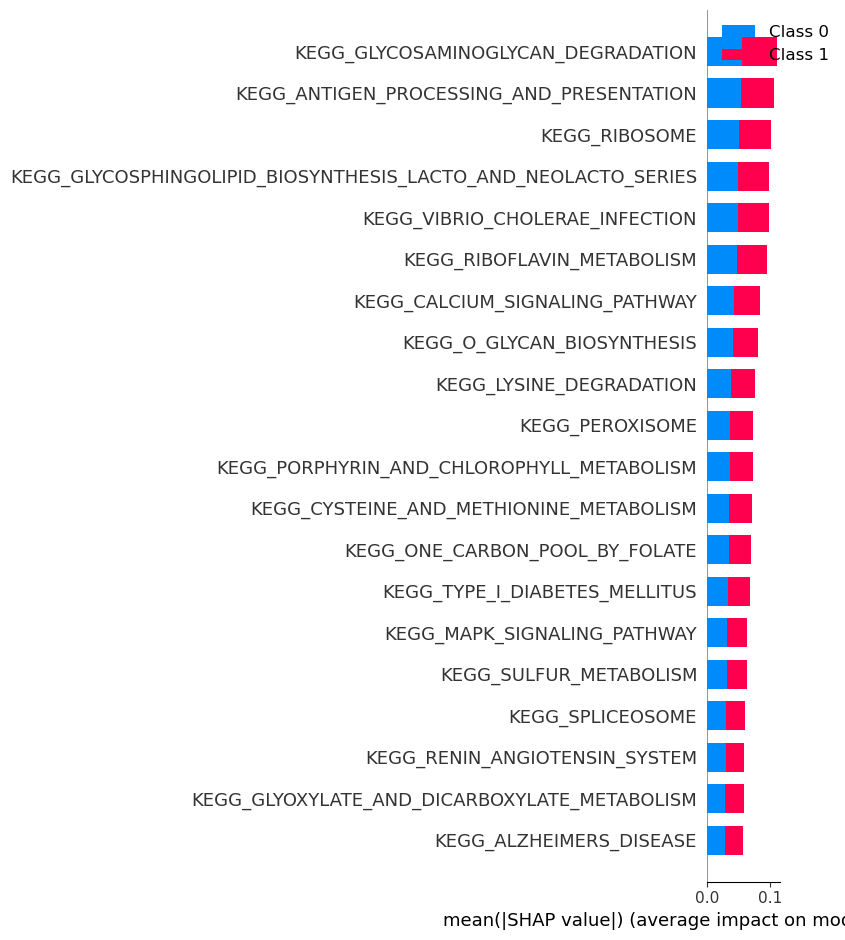

In [6]:
shap.summary_plot(shaps[1],feature_names=features)

In [22]:
result = pd.read_csv("result_mlp.csv", index_col=0)
result['type'] = 'MLP w/o pathway'
result0 = pd.read_csv("result.csv", index_col=0)
result0['type'] = 'Prediction'
result1 = pd.read_csv("result2.csv", index_col=0)
result1['type'] = 'Pathway only'

Text(0, 0.5, '')

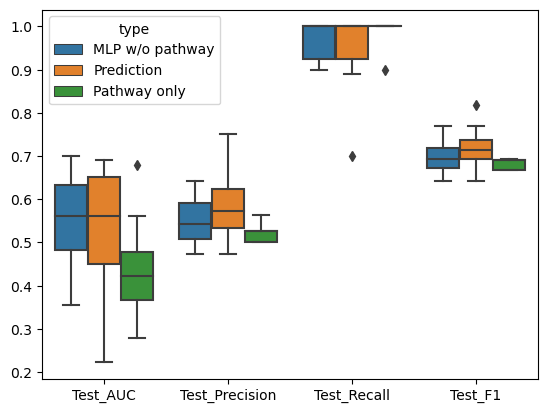

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
perf = pd.concat([result.iloc[:,-5:],result0.iloc[:,-5:],result1.iloc[:,-5:]],axis=0)
df_long = pd.melt(perf, id_vars='type', var_name='Measurement', value_name='Value')
sns.boxplot(x='Measurement', y='Value', hue = 'type', data=df_long)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('Asthma_performance.pdf',format="pdf")

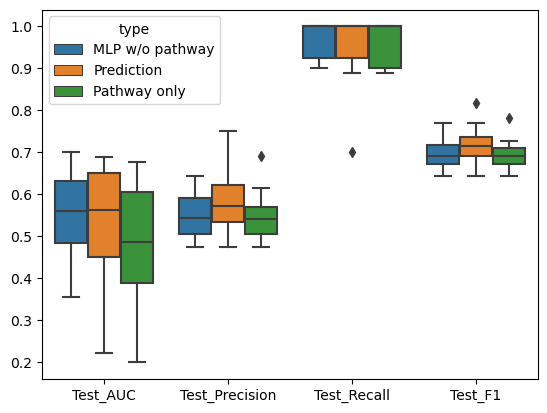

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
perf = pd.concat([result.iloc[:,-5:],result0.iloc[:,-5:],result1.iloc[:,-5:]],axis=0)
df_long = pd.melt(perf, id_vars='type', var_name='Measurement', value_name='Value')
sns.boxplot(x='Measurement', y='Value', hue = 'type', data=df_long)
plt.xlabel('')
plt.ylabel('')
plt.savefig('Asthma_performance.pdf',format="pdf")

In [5]:
for i, shap in enumerate(shaps):
  fi = np.mean(np.abs(shap[1]), axis=0)
  if i == 0:
    df = pd.DataFrame({"Pathway": features, f'Importance{i+1}': fi})
  else:
    df = pd.concat([df,pd.DataFrame({f'Importance{i+1}': fi})],axis=1)
df

,Pathway,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10
0,GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE,0.000186,0.000844,0.001886,0.000908,0.001291,0.000415,0.004137,0.000593,0.000425,0.000407
1,GOBP_REPRODUCTION,0.000647,0.000746,0.000280,0.000500,0.000164,0.001933,0.000355,0.000358,0.000427,0.000942
2,GOBP_SINGLE_STRAND_BREAK_REPAIR,0.000648,0.000535,0.001081,0.001238,0.000349,0.000417,0.000651,0.001953,0.000177,0.000297
3,GOBP_REGULATION_OF_DNA_RECOMBINATION,0.000458,0.002823,0.000897,0.000898,0.000287,0.001565,0.000492,0.001664,0.000405,0.000953
4,GOBP_MITOTIC_SPINDLE_ELONGATION,0.000767,0.002418,0.001067,0.001423,0.000766,0.000411,0.000666,0.002822,0.001435,0.000121
...,...,...,...,...,...,...,...,...,...,...,...
5435,GOBP_NEGATIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.001167,0.002141,0.001295,0.002589,0.001449,0.001465,0.000900,0.000575,0.004742,0.000315
5436,GOBP_POSITIVE_REGULATION_OF_CATION_CHANNEL_ACT...,0.000705,0.000567,0.001342,0.001273,0.000281,0.000802,0.000814,0.002080,0.000188,0.000183
5437,GOBP_REGULATION_OF_CYSTEINE_TYPE_ENDOPEPTIDASE...,0.000595,0.000129,0.001527,0.000495,0.000311,0.004323,0.000234,0.002835,0.000717,0.000479
5438,GOBP_POSITIVE_REGULATION_OF_CYSTEINE_TYPE_ENDO...,0.000420,0.000612,0.001035,0.000308,0.000186,0.001404,0.001867,0.000463,0.003680,0.000509


In [6]:
df['mean'] = df.iloc[:, 1:10].mean(axis=1)
df = df.sort_values(by="mean", ascending=False)
df

,Pathway,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10,mean
549,GOBP_DNA_CATABOLIC_PROCESS,0.000423,0.002450,0.003213,0.002084,0.005971,0.001091,0.001943,0.000753,0.014057,0.000294,0.003554
118,GOBP_MEMBRANE_RAFT_ASSEMBLY,0.000765,0.003933,0.000972,0.002116,0.010301,0.000537,0.002694,0.003480,0.007052,0.000568,0.003539
3906,GOBP_EPITHELIAL_CELL_DIFFERENTIATION_INVOLVED_...,0.000480,0.003718,0.001828,0.001621,0.008824,0.007362,0.001690,0.001045,0.004918,0.001587,0.003499
4365,GOBP_ENDOTHELIAL_CELL_APOPTOTIC_PROCESS,0.000814,0.002540,0.000542,0.000852,0.011551,0.001951,0.002235,0.001336,0.008180,0.000581,0.003333
4045,GOBP_POSITIVE_REGULATION_OF_MITOCHONDRIAL_TRAN...,0.000863,0.001004,0.001075,0.002909,0.006754,0.008157,0.000545,0.003693,0.004065,0.000525,0.003229
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,GOBP_FACIAL_NERVE_MORPHOGENESIS,0.000395,0.000389,0.000538,0.000642,0.000432,0.001083,0.001076,0.000255,0.000158,0.000445,0.000552
2572,GOBP_NEGATIVE_REGULATION_OF_PHOSPHORYLATION,0.000178,0.001232,0.001512,0.000255,0.000423,0.000275,0.000271,0.000407,0.000405,0.000243,0.000551
1905,GOBP_MITOCHONDRIAL_DNA_METABOLIC_PROCESS,0.000310,0.000837,0.000288,0.000448,0.000301,0.000559,0.000262,0.000775,0.001129,0.000244,0.000545
131,GOBP_NEGATIVE_REGULATION_OF_CYTOKINE_PRODUCTION,0.000464,0.000528,0.000446,0.000382,0.000149,0.001531,0.000117,0.000476,0.000620,0.000558,0.000524


In [ ]:
top30 = df.head(30).iloc[::-1]
top30.set_index('Feature', inplace=True)
plt.figure(figsize=(10, 10))
plt.boxplot(top30.iloc[:,:10].T.values, labels=top30.index,vert=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Features')
plt.savefig('top_30_path.png',dpi=300)

In [13]:
df

,Feature,Importance1,Importance2,Importance3,Importance4,Importance5,Importance6,Importance7,Importance8,Importance9,Importance10,mean
150,KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,0.002516,0.019432,0.011287,0.036977,0.038742,0.013286,0.021792,0.044665,0.001282,0.010537,0.021109
129,KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY,0.012549,0.003457,0.040232,0.013471,0.029193,0.010082,0.004275,0.044483,0.024011,0.001786,0.020195
24,KEGG_CARDIAC_MUSCLE_CONTRACTION,0.017278,0.015109,0.014841,0.018533,0.026839,0.004944,0.004711,0.058600,0.013502,0.035221,0.019373
13,KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_...,0.036410,0.049525,0.022124,0.013206,0.011874,0.003552,0.001694,0.031077,0.001284,0.003540,0.018972
15,KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SE...,0.007988,0.023890,0.012233,0.014843,0.020288,0.012339,0.031438,0.010382,0.032616,0.003334,0.018446
...,...,...,...,...,...,...,...,...,...,...,...,...
49,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,0.002907,0.007821,0.003029,0.010122,0.002294,0.001086,0.006335,0.008272,0.002850,0.012346,0.004969
42,KEGG_FATTY_ACID_METABOLISM,0.001487,0.005519,0.005653,0.005636,0.002781,0.002803,0.003260,0.002759,0.009739,0.007592,0.004404
26,KEGG_CIRCADIAN_RHYTHM_MAMMAL,0.004351,0.002789,0.003344,0.018487,0.001448,0.001237,0.004638,0.000430,0.002821,0.027180,0.004394
100,KEGG_CHEMOKINE_SIGNALING_PATHWAY,0.002865,0.001742,0.002290,0.001807,0.005487,0.001774,0.013019,0.000791,0.009762,0.005156,0.004393


In [7]:
df.to_csv("GOBP_Pathway_importance_Asthma.csv",index=None)